**классификатор изображений (RAW)**

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
# !pip3 install scikit-image

In [2]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

## подготовка данных

In [3]:
# from sklearn.datasets import fetch_openml  # https://www.openml.org

## dname = 'Kuzushiji-MNIST'
# dname = 'Fashion-MNIST'

## data = fetch_openml(name=dname)
## print( data.keys() )
## X = data['data'].values.reshape(70000,28,28)
## target = data['target'].astype(np.uint8).values

# X,target = fetch_openml( name=dname, as_frame=False, return_X_y=True)
# X = X.astype(np.float32).reshape(70000,28,28)
# target = target.astype(np.uint8)

# from sklearn.model_selection import train_test_split
# image_train, image_test, target_train, target_test = train_test_split(X, target, test_size=.2)

In [4]:
# from torchvision.datasets import FashionMNIST

# data_train = FashionMNIST(root='./data', train=True,  download=True)
# data_test  = FashionMNIST(root='./data', train=False, download=True)

# image_train = data_train.data.numpy()
# targets_train = data_train.targets.numpy()

# image_test = data_test.data.numpy()
# targets_test = data_test.targets.numpy()

# class_names = data_train.classes

# del data_train
# del data_test

# (
# image_train.shape, targets_train.shape, 
# image_test.shape, targets_test.shape, 
# class_names,
# )

In [ ]:
# !mkdir -p ../data/fashion-mnist
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

# # http://yann.lecun.com/exdb/mnist/
# import gzip
# import idx2numpy

# def ar2im(x): return ((x-x.min())/(x.max()-x.min())*255.).astype(np.uint8)

# DATASET_FOLDER = 'fashion-mnist'

# with gzip.open( DATASET_FOLDER+'/train-images-idx3-ubyte.gz','rb') as f:
#     image_train = idx2numpy.convert_from_string(f.read())
    
# with gzip.open( DATASET_FOLDER+'/train-labels-idx1-ubyte.gz','rb') as f:
#     target_train = idx2numpy.convert_from_string(f.read())

# with gzip.open( DATASET_FOLDER+'/t10k-images-idx3-ubyte.gz','rb') as f:
#     image_test = idx2numpy.convert_from_string(f.read())
    
# with gzip.open( DATASET_FOLDER+'/t10k-labels-idx1-ubyte.gz','rb') as f:
#     target_test = idx2numpy.convert_from_string(f.read())

# image_train.shape, image_test.shape

In [5]:
# ~/.keras/datasets/fashion-mnist
#  t10k-images-idx3-ubyte.gz  
#  t10k-labels-idx1-ubyte.gz  
#  train-images-idx3-ubyte.gz  
#  train-labels-idx1-ubyte.gz

# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz   
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz    

In [6]:
from tensorflow.keras.datasets import fashion_mnist

(image_train, target_train),(image_test, target_test) = fashion_mnist.load_data()

image_train.shape, image_test.shape

2022-11-04 12:56:41.052143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 12:56:41.167169: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-04 12:56:41.651861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/cuda/lib64::/opt/cuda/lib64
2022-11-04 12:56:41.651931: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.

((60000, 28, 28), (10000, 28, 28))

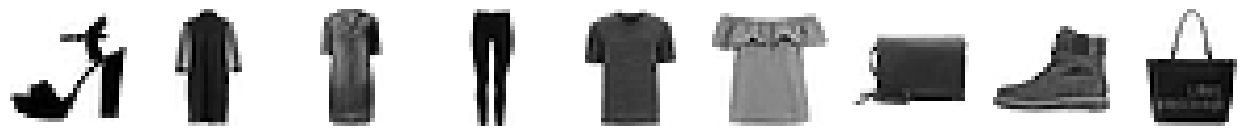

In [7]:
n_show = 9

plt.figure(figsize=(16,4))
for n,i in enumerate(rng.permutation(len(image_train))[:n_show], start=1):
    img = image_train[i]
    
    plt.subplot(1,n_show,n)
    plt.axis(False)
    plt.imshow(img,cmap='gray_r')


In [8]:
n_train,h,w = image_train.shape
n_test,_,_ = image_test.shape

X_train = image_train.reshape(n_train,w*h)
X_test = image_test.reshape(n_test,w*h)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## обучение модели

In [9]:
%%time

from sklearn import svm
from sklearn.model_selection import train_test_split

X_train_, _, target_train_, _ = train_test_split( X_train, target_train, test_size=.73)
print( X_train_.shape)

model = svm.SVC().fit(X_train_,target_train_)

(16200, 784)
CPU times: user 20 s, sys: 123 ms, total: 20.1 s
Wall time: 20.1 s


## оценка результатов

In [10]:
%%time 

o_test = model.predict(X_test)

CPU times: user 37.2 s, sys: 1.02 ms, total: 37.2 s
Wall time: 37.3 s


In [11]:
class_names = [ 
    'футболка', 
    'брюки', 
    'свитер', 
    'платье', 
    'пальто', 
    'сандали', 
    'рубашка', 
    'тапки', 
    'сумка', 
    'полусапожки', 
    ]

In [12]:
from sklearn.metrics import classification_report

print(classification_report(target_test, o_test, target_names=class_names) ) 

              precision    recall  f1-score   support

    футболка       0.81      0.84      0.82      1000
       брюки       0.99      0.95      0.97      1000
      свитер       0.76      0.79      0.77      1000
      платье       0.86      0.88      0.87      1000
      пальто       0.77      0.81      0.79      1000
     сандали       0.95      0.93      0.94      1000
     рубашка       0.69      0.59      0.63      1000
       тапки       0.91      0.94      0.92      1000
       сумка       0.95      0.97      0.96      1000
 полусапожки       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



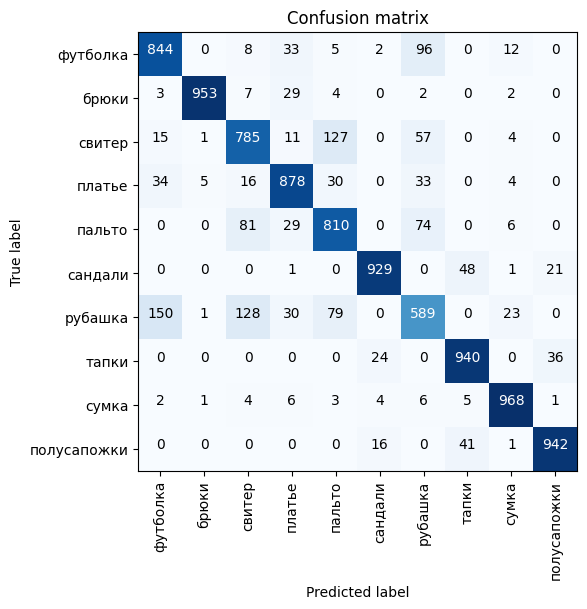

In [13]:
# матрица ошибок
import itertools
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test,o_test)

classes=class_names
thresh = cm.max()/2.
tick_marks = np.arange(len(classes))

fig = plt.figure(figsize=(6,6))
plt.title('Confusion matrix')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    c = 'white' if cm[i,j] > thresh else 'black'
    plt.text(j,i, f'{cm[i,j]}',horizontalalignment="center",color=c)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

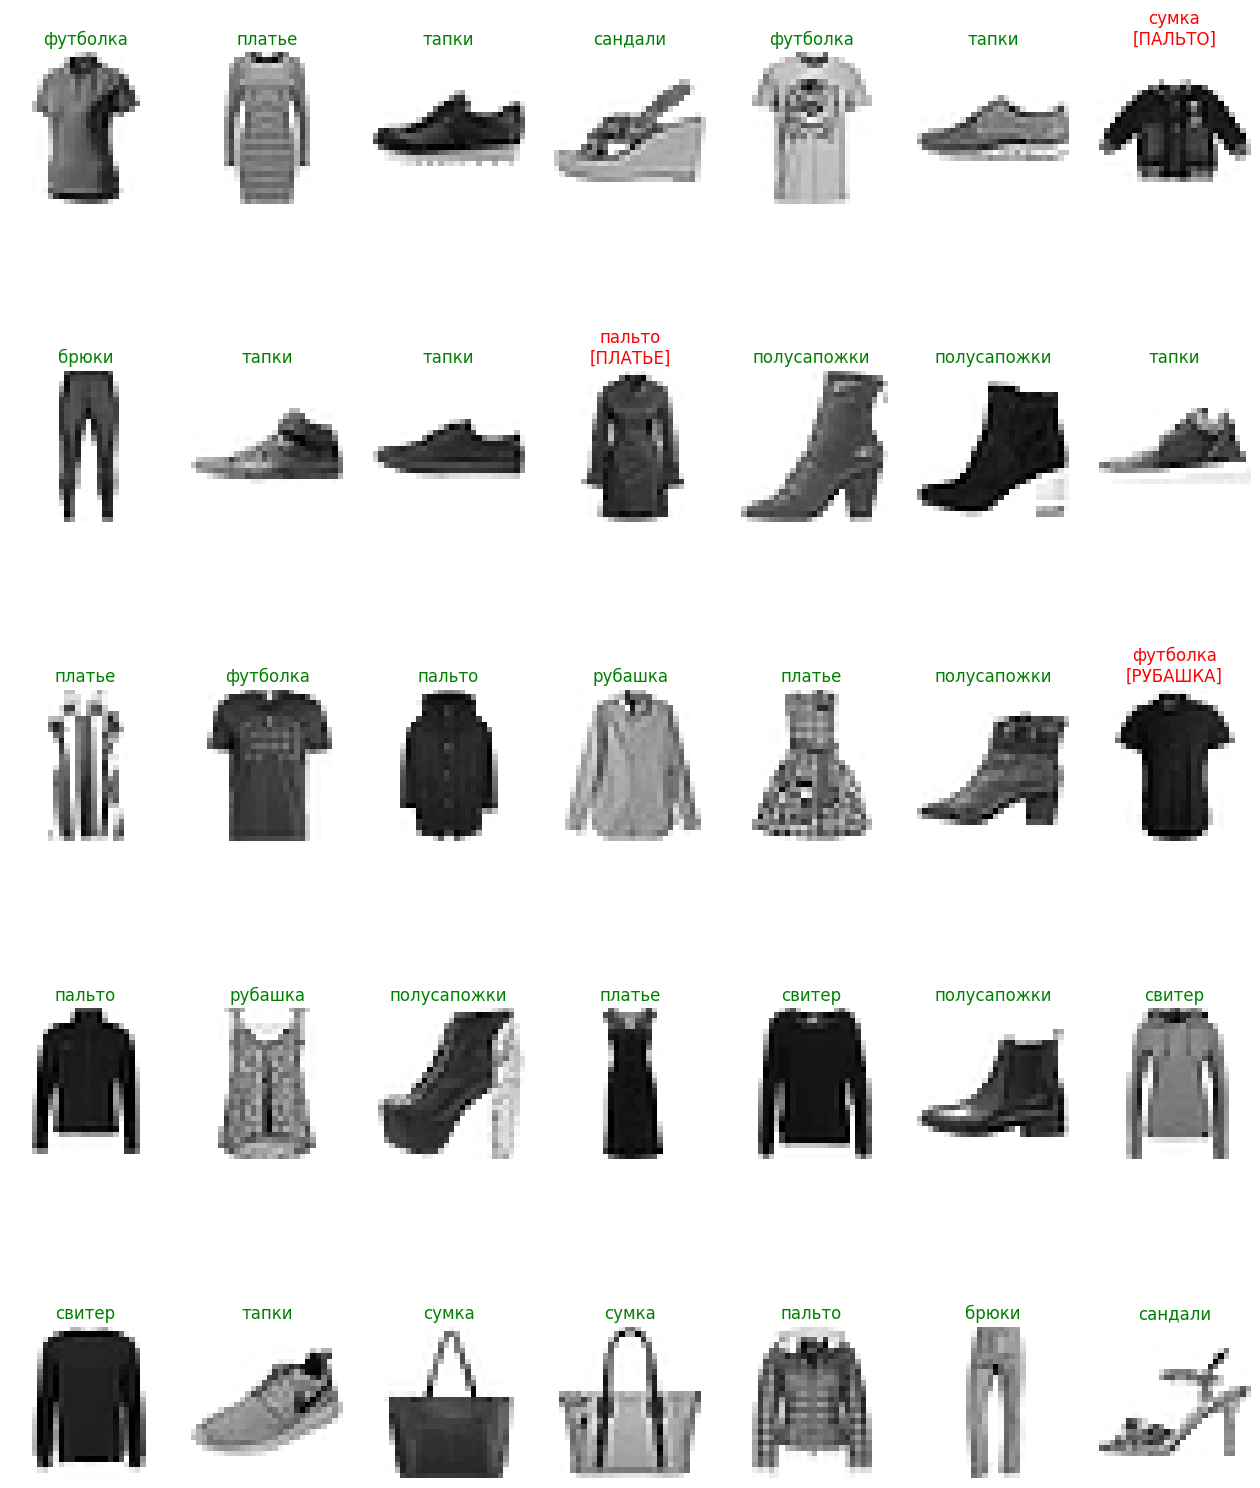

In [14]:
n_show, n_cols = 35, 7

n_rows = np.ceil(n_show/n_cols).astype(int)

plt.figure(figsize=(16,4*n_rows,))
for n,i in enumerate( rng.permutation(len(image_test))[:n_show] ):
    img = image_test[i]
    
    er = target_test[i]==o_test[i]
    t_mark = class_names[target_test[i]] 
    t_pred = class_names[o_test[i]] 
    t,c = (t_mark,'g') if er else (f'{t_pred}\n[{t_mark.upper()}]','r')
   
    plt.subplot(n_rows,n_cols,n+1)
    plt.axis(False)
    plt.title(t,color=c)
    plt.imshow(img,cmap='gray_r')
